### 2. Clinical events (ce.csv) - [One record per event per subject]

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [89]:
# Load clinical events .csv file
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'ce.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))
# Create data frame
clinical_events = pd.read_csv(file_path)

# Sort by the 'USUBJID' and 'CESEQ' columns in ascending order
clinical_events = clinical_events.sort_values(by=['USUBJID','CESEQ'], ascending=True)
clinical_events

,STUDYID,DOMAIN,USUBJID,CESEQ,CEGRPID,CEREFID,CESPID,CETERM,CEMODIFY,CEDECOD,...,CEENDY,CESTRF,CEENRF,CEEVLINT,CEEVINTX,CESTRTPT,CESTTPT,CEENRTPT,CEENTPT,MIDS
432,MSOAC,CE,MSOAC/0031,1,NaN,NaN,NaN,MS RELAPSE,Neurologist Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 1
1334,MSOAC,CE,MSOAC/0031,2,NaN,NaN,NaN,MS RELAPSE,Neurologist Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 2
1022,MSOAC,CE,MSOAC/0035,1,NaN,NaN,NaN,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 1
1368,MSOAC,CE,MSOAC/0035,2,NaN,NaN,NaN,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 2
1819,MSOAC,CE,MSOAC/0041,1,NaN,NaN,NaN,MS EXACERBATION #1,MULTIPLE SCLEROSIS AGGRAVATED,MULTIPLE SCLEROSIS,...,NaN,NaN,ONGOING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,MSOAC,CE,MSOAC/9995,4,NaN,NaN,NaN,UNCONFIRMED MS RELAPSE,Suspected Relapse,RELAPSE-LIKE EVENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,MSOAC,CE,MSOAC/9998,1,NaN,NaN,NaN,Confirmed MS Exacerbation,NaN,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 1
1739,MSOAC,CE,MSOAC/9998,2,NaN,NaN,NaN,Suspected MS Exacerbation,NaN,RELAPSE-LIKE EVENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,MSOAC,CE,MSOAC/9999,1,NaN,NaN,NaN,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS RELAPSE 1


Check how many different patients in the dataset

In [90]:
unique_count = clinical_events['USUBJID'].nunique()
print(f"Number of (unique) patients in this dataset: {unique_count}") #less than the total we have (2465)

Number of (unique) patients in this dataset: 1215


Check columns with missing values

In [91]:
missing_percentage_ce = (clinical_events.isnull().sum() / len(clinical_events)) * 100
missing_clinical_events = pd.DataFrame({'Column Name': missing_percentage_ce.index, 'Missing Percentage': missing_percentage_ce.values})
missing_clinical_events = missing_clinical_events.sort_values(by='Missing Percentage', ascending=False)
print(missing_clinical_events)

   Column Name  Missing Percentage
14      CESTAT          100.000000
37    CEEVLINT          100.000000
30     CESTDTC          100.000000
31     CEENDTC          100.000000
25     CETOXGR          100.000000
23     CESHOSP          100.000000
21      CEPATT          100.000000
35      CESTRF          100.000000
18       CELAT          100.000000
17       CELOC          100.000000
15    CEREASND          100.000000
29       CEDTC          100.000000
28       EPOCH          100.000000
11      CESCAT          100.000000
38    CEEVINTX          100.000000
39    CESTRTPT          100.000000
40     CESTTPT          100.000000
6       CESPID          100.000000
5      CEREFID          100.000000
4      CEGRPID          100.000000
41    CEENRTPT          100.000000
42     CEENTPT          100.000000
36      CEENRF           99.598841
22       CEOUT           87.162915
10       CECAT           85.892579
34      CEENDY           81.034099
24    CECONTRT           81.034099
20       CESER      

Drop columns with more than 80% missing values and others, namely:
- **STUDYID**: (irrelevant)
- **DOMAIN**: (irrelevant)
- **CEGRPID, CEREFID, CESPID, CESCAT, CESTAT, CEREASND, CELOC, CELAT, CEPATT, CETOXGR, EPOCH, CEDTC, CESTDTC, CEENDTC, CESTRF, CEEVLINT,CEEVINTX, CESTRTPT, CESTTPT, CEENRTPT, CEENTPT**: (all values missing and not mentioned in the dataset)
- **VISITNUM**: Visit Number (kind of a code number for VISIT, they give the same info and missing value in same rows)

Columns being dropped, but not sure if we *should keep*:
- **CESHOSP**: Requires or Prolongs Hospitalization (all values missing but is mentioned in the dictionary)
- **CECAT**: Category for Clinical Event (and 86% missing)
- **CEOUT**: Outcome of Event (87% missing)
- **CEENRF**: End Relative to Reference Period (99.6% missing)

In [92]:
# start by dropping columns with all missing
columns_to_drop = missing_clinical_events[missing_clinical_events['Missing Percentage'] > 85]['Column Name'].tolist()
additional_columns_to_drop = ['STUDYID', 'DOMAIN']  # Add your column names here
columns_to_drop.extend(additional_columns_to_drop)
clinical_events.drop(columns=columns_to_drop, inplace=True)
clinical_events

,USUBJID,CESEQ,CETERM,CEMODIFY,CEDECOD,CEPRESP,CEOCCUR,CEBODSYS,CESEV,CESER,CECONTRT,VISITNUM,VISIT,CEDY,CESTDY,CEENDY,MIDS
432,MSOAC/0031,1,MS RELAPSE,Neurologist Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,Nervous system disorders,MILD,N,Y,NaN,NaN,NaN,268.0,279.0,MS RELAPSE 1
1334,MSOAC/0031,2,MS RELAPSE,Neurologist Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,Nervous system disorders,MILD,N,Y,NaN,NaN,NaN,814.0,NaN,MS RELAPSE 2
1022,MSOAC/0035,1,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,144.0,NaN,MS RELAPSE 1
1368,MSOAC/0035,2,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,221.0,NaN,MS RELAPSE 2
1819,MSOAC/0041,1,MS EXACERBATION #1,MULTIPLE SCLEROSIS AGGRAVATED,MULTIPLE SCLEROSIS,NaN,NaN,Nervous system disorders,MILD,N,NaN,NaN,NaN,NaN,179.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,MSOAC/9995,4,UNCONFIRMED MS RELAPSE,Suspected Relapse,RELAPSE-LIKE EVENT,NaN,NaN,NaN,MILD,NaN,NaN,NaN,NaN,NaN,682.0,NaN,NaN
871,MSOAC/9998,1,Confirmed MS Exacerbation,NaN,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,Nervous system disorders,NaN,NaN,Y,3.0,MONTH 3,85.0,79.0,NaN,MS RELAPSE 1
1739,MSOAC/9998,2,Suspected MS Exacerbation,NaN,RELAPSE-LIKE EVENT,NaN,NaN,Nervous system disorders,NaN,NaN,Y,999.0,UNSCHEDULED,95.0,NaN,NaN,NaN
975,MSOAC/9999,1,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,MULTIPLE SCLEROSIS RELAPSE,NaN,NaN,NaN,MILD,NaN,NaN,NaN,NaN,NaN,69.0,NaN,MS RELAPSE 1


- descriptive analysis of continuous variables

In [93]:
continuous_columns = ['CEDY','CESTDY','CEENDY']

descriptive_continuous = {
    'Count': clinical_events[continuous_columns].count(), #cases that are not missing
    'Missing Cases': clinical_events[continuous_columns].isna().sum(),
    'Mean': clinical_events[continuous_columns].mean(),
    'Standard Deviation': clinical_events[continuous_columns].std()
}

cont_clinical_events = pd.DataFrame(descriptive_continuous)

print(cont_clinical_events)

        Count  Missing Cases        Mean  Standard Deviation
CEDY     2482           2005  383.682917          219.006862
CESTDY   1968           2519  385.452236          298.653233
CEENDY    851           3636  331.262045          221.707530


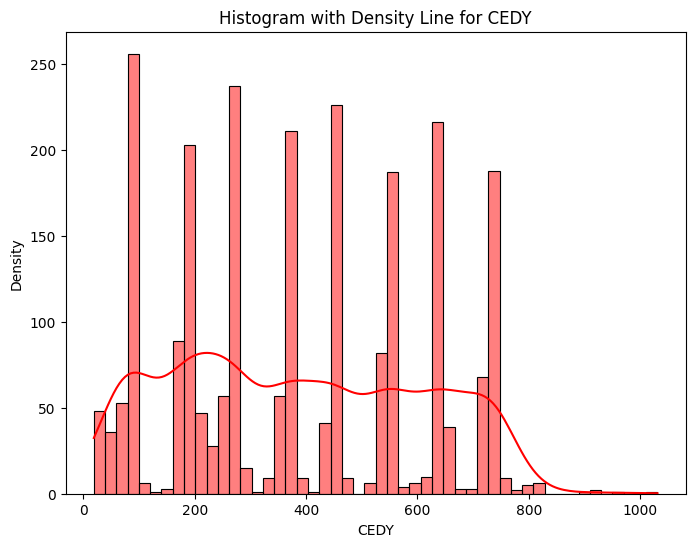

In [94]:
CEDY = clinical_events['CEDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(CEDY, kde=True, color='red', bins=50)
plt.xlabel('CEDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for CEDY')
plt.show() # more or less normaly distributed

In [95]:
CEDY.describe()

count    2482.000000
mean      383.682917
std       219.006862
min        19.000000
25%       186.000000
50%       365.000000
75%       553.000000
max      1031.000000
Name: CEDY, dtype: float64

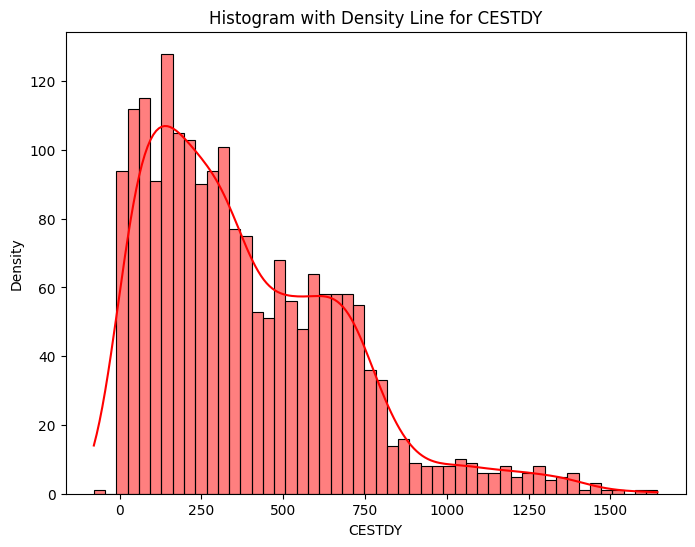

In [96]:
CESTDY = clinical_events['CESTDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(CESTDY, kde=True, color='red', bins=50)
plt.xlabel('CESTDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for CESTDY')
plt.show()

In [97]:
CESTDY.describe()

count    1968.000000
mean      385.452236
std       298.653233
min       -79.000000
25%       147.000000
50%       315.000000
75%       584.250000
max      1644.000000
Name: CESTDY, dtype: float64

- descriptive analysis of categorical variables

In [98]:
ceterm_counts_clinical_events = clinical_events['CETERM'].value_counts().reset_index()
ceterm_counts_clinical_events.columns = ['CETERM', 'Count']
print(ceterm_counts_clinical_events.head(55))

                                     CETERM  Count
0         POSSIBLE RELAPSE SINCE LAST VISIT   2451
1              MS RELAPSE CONFIRMED BY EDSS    762
2                                MS RELAPSE    573
3                    UNCONFIRMED MS RELAPSE    271
4                           MS EXACERBATION     30
5             RELAPSE OF MULTIPLE SCLEROSIS     23
6                                MS-RELAPSE     21
7                             RELAPSE OF MS     20
8                 Confirmed MS Exacerbation     19
9                                   RELAPSE     18
10                                MS RELAPS     14
11                             MS - RELAPSE     14
12                            MS RELAPSE #1     12
13                Suspected MS Exacerbation     12
14               MULTIPLE SCLEROSIS RELAPSE     10
15                             M.S. RELAPSE      8
16          MS RELAPSE NON-PROTOCOL DEFINED      7
17           MS RELAPSE DEFINED BY PROTOCOL      6
18         MS RELAPSE: NON-PROT

In [99]:
filtered_df = clinical_events[clinical_events['CETERM'] == 'POSSIBLE RELAPSE SINCE LAST VISIT']
unique_ids_count = filtered_df['USUBJID'].nunique()

print("Number of unique IDs:", unique_ids_count)

Number of unique IDs: 304


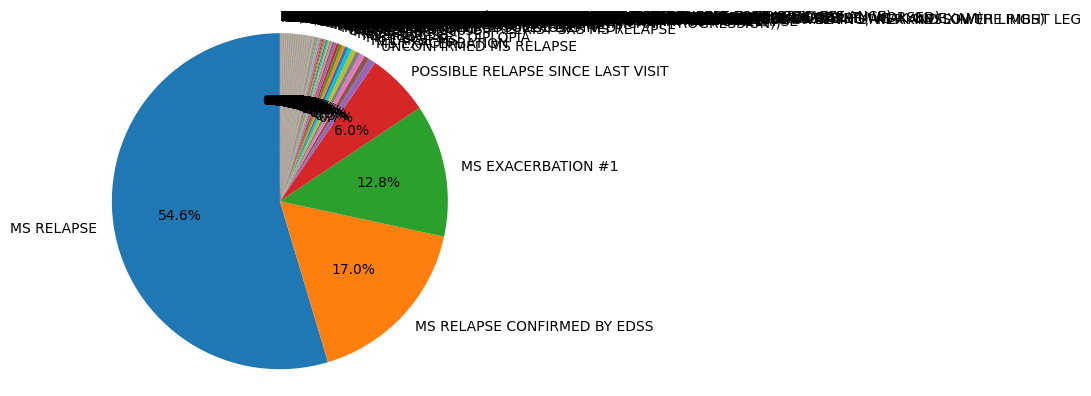

In [100]:
# Pie chart - dropped NA for now
categories = clinical_events['CETERM'].dropna().unique()
category_counts = clinical_events['CETERM'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
#plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show() #do something with this one

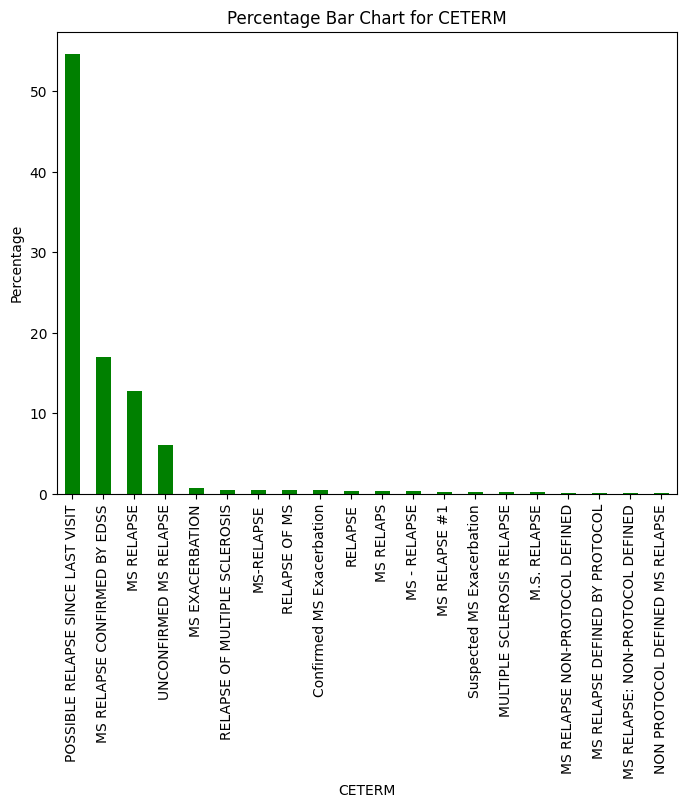

In [101]:
ceterm = clinical_events['CETERM'].dropna()

total_count = len(ceterm)
percentage = ceterm.value_counts(normalize=True) * 100
top_20_percentage = percentage.head(20)

plt.figure(figsize=(8, 6))
top_20_percentage.plot(kind='bar', color='green')
plt.xlabel('CETERM')
plt.ylabel('Percentage')
plt.title('Percentage Bar Chart for CETERM')
plt.show()

In [102]:
#when CETERM is 'POSSIBLE RELAPSE SINCE LAST VISIT', there is no information for CEMODIFY - so we "merge" these columns
cemodify_counts_clinical_events = clinical_events['CEMODIFY'].value_counts().reset_index()
cemodify_counts_clinical_events.columns = ['CEMODIFY', 'Count']
print(cemodify_counts_clinical_events) # DROP!!! -- or this one might be more important than TERM

                             CEMODIFY  Count
0              EDSS Confirmed Relapse    762
1                   Suspected Relapse    470
2       Neurologist Confirmed Relapse    459
3              INEC Confirmed Relapse    181
4                   Confirmed Relapse     84
5        Non-Protocol Defined Relapse     24
6                  Multiple Sclerosis     14
7       MULTIPLE SCLEROSIS AGGRAVATED      7
8   PROGRESSION OF MULTIPLE SCLEROSIS      2
9                  MULTIPLE SCLEROSIS      1
10                   MS-LIKE SYNDROME      1


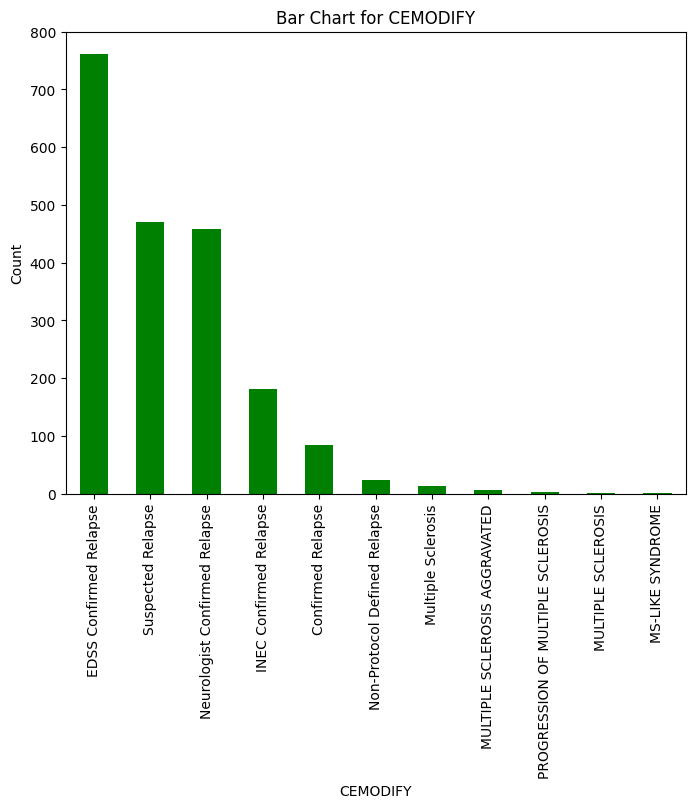

In [103]:
cemodify = clinical_events['CEMODIFY'].dropna()

plt.figure(figsize=(8, 6))
cemodify.value_counts().plot(kind='bar', color='green')
plt.xlabel('CEMODIFY')
plt.ylabel('Count')
plt.title('Bar Chart for CEMODIFY')
plt.show()

In [104]:
cedecod_counts_clinical_events = clinical_events['CEDECOD'].value_counts().reset_index()
cedecod_counts_clinical_events.columns = ['CEDECOD', 'Count']
print(cedecod_counts_clinical_events) #put everything upper case

                      CEDECOD  Count
0  MULTIPLE SCLEROSIS RELAPSE   1505
1          RELAPSE-LIKE EVENT    506
2          MULTIPLE SCLEROSIS     24
3          Multiple sclerosis      1


In [105]:
clinical_events['CEDECOD'] = clinical_events['CEDECOD'].str.upper()
cedecod_counts_clinical_events = clinical_events['CEDECOD'].value_counts().reset_index()
cedecod_counts_clinical_events.columns = ['CEDECOD', 'Count']
print(cedecod_counts_clinical_events) # DROP

                      CEDECOD  Count
0  MULTIPLE SCLEROSIS RELAPSE   1505
1          RELAPSE-LIKE EVENT    506
2          MULTIPLE SCLEROSIS     25


- Note: when CETERM is 'POSSIBLE RELAPSE SINCE LAST VISIT', there is no information for CEMODIFY, CEDECOD and CESEV

In [106]:
clinical_events['CEPRESP'] = clinical_events['CEPRESP'].str.upper()
cepresp_counts_clinical_events = clinical_events['CEPRESP'].value_counts().reset_index()
cepresp_counts_clinical_events.columns = ['CEPRESP', 'Count']
print(cepresp_counts_clinical_events) #drop

  CEPRESP  Count
0       Y   2451


- Note: when CETERM is 'POSSIBLE RELAPSE SINCE LAST VISIT', we have values for CEPRESP and CEOCCUR

In [107]:
clinical_events['CEOCCUR'] = clinical_events['CEOCCUR'].str.upper()
ceoccur_counts_clinical_events = clinical_events['CEOCCUR'].value_counts().reset_index()
ceoccur_counts_clinical_events.columns = ['CEOCCUR', 'Count']
print(ceoccur_counts_clinical_events) 

  CEOCCUR  Count
0       N   2354
1       Y     97


In [108]:
clinical_events['CESER'] = clinical_events['CESER'].str.upper()
ceser_counts_clinical_events = clinical_events['CESER'].value_counts().reset_index()
ceser_counts_clinical_events.columns = ['CESER', 'Count']
print(ceser_counts_clinical_events) 

  CESER  Count
0     N    790
1     Y    175


In [109]:
clinical_events['CEBODSYS'] = clinical_events['CEBODSYS'].str.upper()
cebodsys_counts_clinical_events = clinical_events['CEBODSYS'].value_counts().reset_index()
cebodsys_counts_clinical_events.columns = ['CEBODSYS', 'Count']
print(cebodsys_counts_clinical_events) #drop

                   CEBODSYS  Count
0  NERVOUS SYSTEM DISORDERS   1003


the way this variable exists considering CEMODIFY does not have a clear pattern

In [110]:
clinical_events['CECONTRT'] = clinical_events['CECONTRT'].str.upper()
cecontrt_counts_clinical_events = clinical_events['CECONTRT'].value_counts().reset_index()
cecontrt_counts_clinical_events.columns = ['CECONTRT', 'Count']
print(cecontrt_counts_clinical_events) # Concomitant or Additional Trtmnt Given - keep

  CECONTRT  Count
0        Y    666
1        N    185


In [111]:
cesev_counts_clinical_events = clinical_events['CESEV'].value_counts().reset_index()
cesev_counts_clinical_events.columns = ['CESEV', 'Count']
print(cesev_counts_clinical_events) #severeness of relapse

      CESEV  Count
0  MODERATE    989
1      MILD    784
2    SEVERE    226


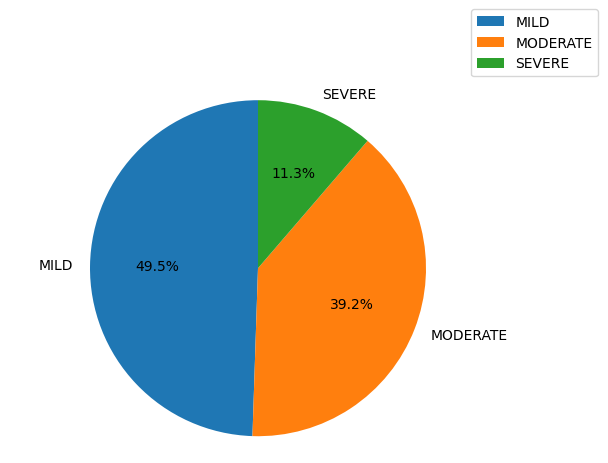

In [112]:
# Pie chart - dropped NA for now
categories = clinical_events['CESEV'].dropna().unique()
category_counts = clinical_events['CESEV'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [113]:
visitnum_counts_clinical_events = clinical_events['VISITNUM'].value_counts().reset_index()
visitnum_counts_clinical_events.columns = ['VISITNUM', 'Count']
print(visitnum_counts_clinical_events)

    VISITNUM  Count
0        5.0    297
1        6.0    293
2        9.0    287
3       10.0    282
4       12.0    276
5       11.0    271
6       14.0    267
7       13.0    266
8      300.0    214
9        3.0     50
10       4.0     47
11       7.0     44
12       8.0     44
13      15.1     21
14     999.0     19
15      15.2      8
16      15.3      3
17      24.0      2
18      27.0      2
19      18.0      1
20      15.0      1
21     998.0      1


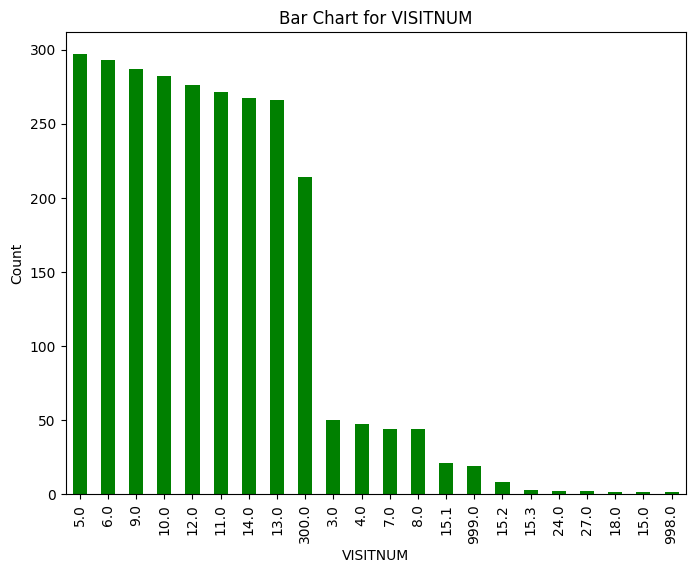

In [114]:
visitnum = clinical_events['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
visitnum.value_counts().plot(kind='bar', color='green')
plt.xlabel('VISITNUM')
plt.ylabel('Count')
plt.title('Bar Chart for VISITNUM')
plt.show()

In [115]:
visit_counts_clinical_events = clinical_events['VISIT'].value_counts().reset_index()
visit_counts_clinical_events.columns = ['VISIT', 'Count']
print(visit_counts_clinical_events) #same info as VISITNUM it seems

                     VISIT  Count
0                  VISIT 5    297
1                  VISIT 6    291
2                  VISIT 9    287
3                 VISIT 10    282
4                 VISIT 12    275
5                 VISIT 11    271
6                 VISIT 14    267
7                 VISIT 13    266
8         UNSCD RLPSE EVAL    214
9                  VISIT 3     48
10                 VISIT 4     47
11                 VISIT 8     44
12                 VISIT 7     44
13  EARLY WITHDRAWAL VISIT     21
14             UNSCHEDULED     19
15      FOLLOW UP MONTH 27      8
16         FOLLOW UP VISIT      3
17                MONTH 24      2
18                 MONTH 6      2
19                MONTH 27      2
20                 MONTH 3      2
21                MONTH 18      1
22                MONTH 15      1
23     EARLY/TERMINATION 2      1
24                MONTH 12      1


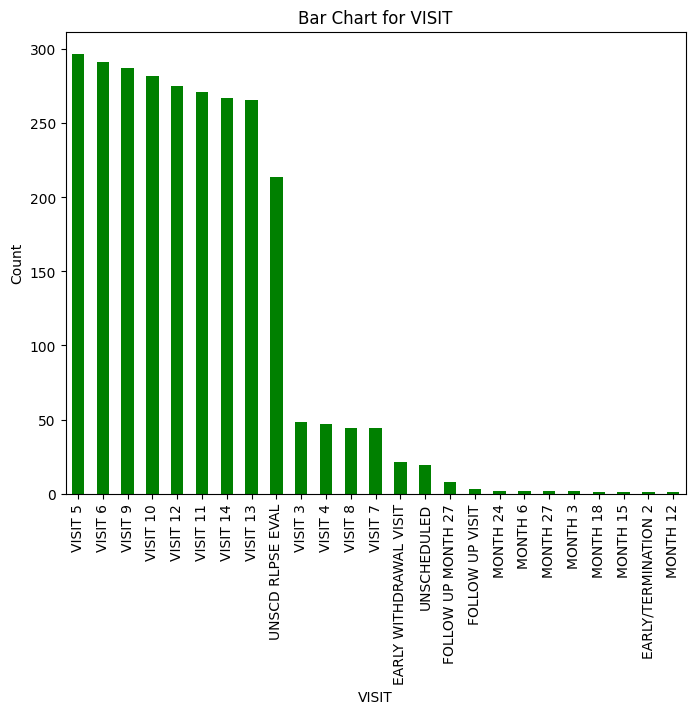

In [116]:
visit = clinical_events['VISIT'].dropna()

plt.figure(figsize=(8, 6))
visit.value_counts().plot(kind='bar', color='green')
plt.xlabel('VISIT')
plt.ylabel('Count')
plt.title('Bar Chart for VISIT')
plt.show()

In [117]:
mids_counts_clinical_events = clinical_events['MIDS'].value_counts().reset_index()
mids_counts_clinical_events.columns = ['MIDS', 'Count']
print(mids_counts_clinical_events) 

           MIDS  Count
0  MS RELAPSE 1    852
1  MS RELAPSE 2    367
2  MS RELAPSE 3    156
3  MS RELAPSE 4     75
4  MS RELAPSE 5     36
5  MS RELAPSE 6     14
6  MS RELAPSE 7      3
7  MS RELAPSE 8      1
8  MS RELAPSE 9      1


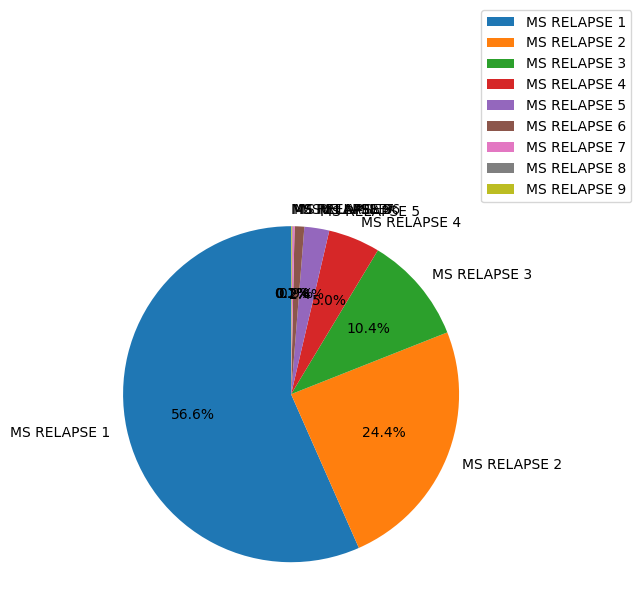

In [118]:
# Pie chart - dropped NA for now
categories = clinical_events['MIDS'].dropna().unique()
category_counts = clinical_events['MIDS'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

#### Data Transformation

In [119]:
filtered_ce = clinical_events[clinical_events['CEMODIFY'].isin(['Multiple Sclerosis','MULTIPLE SCLEROSIS AGGRAVATED','PROGRESSION OF MULTIPLE SCLEROSIS','MULTIPLE SCLEROSIS','MS-LIKE SYNDROME'])]
filtered_ce

,USUBJID,CESEQ,CETERM,CEMODIFY,CEDECOD,CEPRESP,CEOCCUR,CEBODSYS,CESEV,CESER,CECONTRT,VISITNUM,VISIT,CEDY,CESTDY,CEENDY,MIDS
1819,MSOAC/0041,1,MS EXACERBATION #1,MULTIPLE SCLEROSIS AGGRAVATED,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,NaN,NaN,NaN,NaN,179.0,NaN,NaN
1730,MSOAC/0539,1,WORSENING MS SYMPTOMS,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,Y,NaN,NaN,NaN,398.0,NaN,NaN
48,MSOAC/0649,1,MS WORSENING,MULTIPLE SCLEROSIS,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,NaN,NaN,NaN,NaN,47.0,56.0,NaN
319,MSOAC/1420,1,TRANSISTENT WORSENING OF MS SYMPTOMS (NOT MS R...,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,N,NaN,NaN,NaN,211.0,213.0,NaN
362,MSOAC/1420,2,TRANSIENT WORSENING OF MS SYMPTOMS (NOT MS REL...,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,N,NaN,NaN,NaN,239.0,246.0,NaN
2009,MSOAC/1816,1,UTHOFF PHENOMENON,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,MSOAC/2918,1,WORSENING OF MS-SYMPTOMS,MULTIPLE SCLEROSIS AGGRAVATED,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,NaN,NaN,NaN,NaN,92.0,96.0,NaN
2012,MSOAC/3151,1,PROGRESSION OFF MS-SYMPTOMS,PROGRESSION OF MULTIPLE SCLEROSIS,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MODERATE,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,MSOAC/3246,1,DETERIORATON OF MS SYMPTOMS,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,N,NaN,NaN,NaN,110.0,144.0,NaN
736,MSOAC/3581,2,INFECTION ASSOCIATED MS PROGRESSION,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,Y,N,NaN,NaN,NaN,628.0,630.0,NaN


In [120]:
relation = clinical_events.loc[clinical_events['CEMODIFY'].isnull(), 'CETERM'].unique()
relation

array(['POSSIBLE RELAPSE SINCE LAST VISIT', 'Confirmed MS Exacerbation',
       'Suspected MS Exacerbation'], dtype=object)

In [121]:
#when CETERM is 'POSSIBLE RELAPSE SINCE LAST VISIT', there is no information for CEMODIFY - so we "merge" these columns
clinical_events['CEMODIFY'].fillna(clinical_events['CETERM'], inplace=True)
cemodify_counts_clinical_events = clinical_events['CEMODIFY'].value_counts().reset_index()
cemodify_counts_clinical_events.columns = ['CEMODIFY', 'Count']
print(cemodify_counts_clinical_events) # DROP!!! -- or this one might be more important than TERM

                             CEMODIFY  Count
0   POSSIBLE RELAPSE SINCE LAST VISIT   2451
1              EDSS Confirmed Relapse    762
2                   Suspected Relapse    470
3       Neurologist Confirmed Relapse    459
4              INEC Confirmed Relapse    181
5                   Confirmed Relapse     84
6        Non-Protocol Defined Relapse     24
7           Confirmed MS Exacerbation     19
8                  Multiple Sclerosis     14
9           Suspected MS Exacerbation     12
10      MULTIPLE SCLEROSIS AGGRAVATED      7
11  PROGRESSION OF MULTIPLE SCLEROSIS      2
12                 MULTIPLE SCLEROSIS      1
13                   MS-LIKE SYNDROME      1


C:\Users\anaso\AppData\Local\Temp\ipykernel_26520\2283805813.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clinical_events['CEMODIFY'].fillna(clinical_events['CETERM'], inplace=True)


In [122]:
ms_entries = ['Multiple Sclerosis','MULTIPLE SCLEROSIS', 'MULTIPLE SCLEROSIS AGGRAVATED', 'PROGRESSION OF MULTIPLE SCLEROSIS', 'MS-LIKE SYNDROME'] #,'Confirmed MS Exacerbation','Suspected MS Exacerbation'

# Filter rows where 'CEMODIFY' is in the list of Multiple Sclerosis entries
result = clinical_events[clinical_events['CEMODIFY'].isin(ms_entries)]
result

,USUBJID,CESEQ,CETERM,CEMODIFY,CEDECOD,CEPRESP,CEOCCUR,CEBODSYS,CESEV,CESER,CECONTRT,VISITNUM,VISIT,CEDY,CESTDY,CEENDY,MIDS
1819,MSOAC/0041,1,MS EXACERBATION #1,MULTIPLE SCLEROSIS AGGRAVATED,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,NaN,NaN,NaN,NaN,179.0,NaN,NaN
1730,MSOAC/0539,1,WORSENING MS SYMPTOMS,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,Y,NaN,NaN,NaN,398.0,NaN,NaN
48,MSOAC/0649,1,MS WORSENING,MULTIPLE SCLEROSIS,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,NaN,NaN,NaN,NaN,47.0,56.0,NaN
319,MSOAC/1420,1,TRANSISTENT WORSENING OF MS SYMPTOMS (NOT MS R...,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,N,NaN,NaN,NaN,211.0,213.0,NaN
362,MSOAC/1420,2,TRANSIENT WORSENING OF MS SYMPTOMS (NOT MS REL...,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,N,NaN,NaN,NaN,239.0,246.0,NaN
2009,MSOAC/1816,1,UTHOFF PHENOMENON,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,MSOAC/2918,1,WORSENING OF MS-SYMPTOMS,MULTIPLE SCLEROSIS AGGRAVATED,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,NaN,NaN,NaN,NaN,92.0,96.0,NaN
2012,MSOAC/3151,1,PROGRESSION OFF MS-SYMPTOMS,PROGRESSION OF MULTIPLE SCLEROSIS,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MODERATE,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,MSOAC/3246,1,DETERIORATON OF MS SYMPTOMS,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,N,N,NaN,NaN,NaN,110.0,144.0,NaN
736,MSOAC/3581,2,INFECTION ASSOCIATED MS PROGRESSION,Multiple Sclerosis,MULTIPLE SCLEROSIS,NaN,NaN,NERVOUS SYSTEM DISORDERS,MILD,Y,N,NaN,NaN,NaN,628.0,630.0,NaN


The last five categories seem a bit out of place - is it ok to remove these rows?

In [123]:
# remove rows where CEDECOD is MULTIPLE SCLEROSIS -- we do not know if it's a relapse event (confirmed or unconfirmed)
ms_entries = ['Multiple Sclerosis', 'MULTIPLE SCLEROSIS', 'MULTIPLE SCLEROSIS AGGRAVATED', 'PROGRESSION OF MULTIPLE SCLEROSIS', 'MS-LIKE SYNDROME']
clinical_events = clinical_events[~clinical_events['CEMODIFY'].isin(ms_entries)]


In [124]:
# new columns to drop
columns_to_drop_2 = ['VISIT','VISITNUM','CEDECOD','CEENDY','CEDY','CEPRESP','CEBODSYS'] #'MIDS', 'CESTDY',
#mids already exists in SM dataset and has one more patient
#visit, visitnum, cepresp and cedecod irrelevant
#cedy, cestdy and ceendy not relevant for a static dataset
#cebodsys appearance seems random
clinical_events.drop(columns=columns_to_drop_2, inplace=True)
clinical_events

C:\Users\anaso\AppData\Local\Temp\ipykernel_26520\735759713.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_events.drop(columns=columns_to_drop_2, inplace=True)


,USUBJID,CESEQ,CETERM,CEMODIFY,CEOCCUR,CESEV,CESER,CECONTRT,CESTDY,MIDS
432,MSOAC/0031,1,MS RELAPSE,Neurologist Confirmed Relapse,NaN,MILD,N,Y,268.0,MS RELAPSE 1
1334,MSOAC/0031,2,MS RELAPSE,Neurologist Confirmed Relapse,NaN,MILD,N,Y,814.0,MS RELAPSE 2
1022,MSOAC/0035,1,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,NaN,MODERATE,NaN,NaN,144.0,MS RELAPSE 1
1368,MSOAC/0035,2,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,NaN,MODERATE,NaN,NaN,221.0,MS RELAPSE 2
2375,MSOAC/0041,2,POSSIBLE RELAPSE SINCE LAST VISIT,POSSIBLE RELAPSE SINCE LAST VISIT,N,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1959,MSOAC/9995,4,UNCONFIRMED MS RELAPSE,Suspected Relapse,NaN,MILD,NaN,NaN,682.0,NaN
871,MSOAC/9998,1,Confirmed MS Exacerbation,Confirmed MS Exacerbation,NaN,NaN,NaN,Y,79.0,MS RELAPSE 1
1739,MSOAC/9998,2,Suspected MS Exacerbation,Suspected MS Exacerbation,NaN,NaN,NaN,Y,NaN,NaN
975,MSOAC/9999,1,MS RELAPSE CONFIRMED BY EDSS,EDSS Confirmed Relapse,NaN,MILD,NaN,NaN,69.0,MS RELAPSE 1


In [125]:
# Extract numeric values from 'MIDS' column and convert to integer, replacing NaN with 0 (or any other default value)
clinical_events['Number'] = clinical_events['MIDS'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

# Calculate the maximum value within each group defined by 'USUBJID' and create a new column 'NMIDS'
clinical_events['NMIDS'] = clinical_events.groupby('USUBJID')['Number'].transform('max')

C:\Users\anaso\AppData\Local\Temp\ipykernel_26520\481595458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_events['Number'] = clinical_events['MIDS'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)
C:\Users\anaso\AppData\Local\Temp\ipykernel_26520\481595458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_events['NMIDS'] = clinical_events.groupby('USUBJID')['Number'].transform('max')


In [126]:
clinical_events['TOTRELAP'] = clinical_events.groupby('USUBJID')['USUBJID'].transform('count')
clinical_events.drop(columns=['MIDS','Number','CESEQ'], inplace=True)

C:\Users\anaso\AppData\Local\Temp\ipykernel_26520\545041706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_events['TOTRELAP'] = clinical_events.groupby('USUBJID')['USUBJID'].transform('count')
C:\Users\anaso\AppData\Local\Temp\ipykernel_26520\545041706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_events.drop(columns=['MIDS','Number','CESEQ'], inplace=True)


In [127]:
def aggregate_and_remove_duplicates(series):
    unique_values = set(series.dropna())  # Drop NaN and convert to set
    return '; '.join(map(str, unique_values))

clinical_events_aggregated = clinical_events.groupby('USUBJID').agg(aggregate_and_remove_duplicates).reset_index()
#medical_history_aggregated = medical_history.groupby('USUBJID').agg(lambda x: ', '.join(map(str, x))).reset_index()

#clinical_events_aggregated.drop(columns=['MIDS','Number','UCRELAP','CESEQ'], inplace=True)
clinical_events_aggregated.replace('', np.nan, inplace=True)
clinical_events_aggregated.drop(columns=['CETERM','CEMODIFY','CESTDY','CESER','CEOCCUR','NMIDS'], inplace=True)

# Display the aggregated DataFrame
clinical_events_aggregated

,USUBJID,CESEV,CECONTRT,TOTRELAP
0,MSOAC/0031,MILD,Y,2
1,MSOAC/0035,MODERATE,NaN,2
2,MSOAC/0041,NaN,NaN,4
3,MSOAC/0044,MILD; MODERATE,NaN,3
4,MSOAC/0046,MODERATE,Y,2
...,...,...,...,...
1201,MSOAC/9968,NaN,NaN,8
1202,MSOAC/9981,NaN,NaN,12
1203,MSOAC/9995,MILD,NaN,4
1204,MSOAC/9998,NaN,Y,2


In [128]:
def replace_words(row):
    if isinstance(row, str):
        if 'SEVERE' in row:
            return 'SEVERE'
        elif 'MODERATE' in row:
            return 'MODERATE'
        elif 'MILD' in row:
            return 'MILD'
        else:
            return row
    else:
        return row


# Applying the function to the DataFrame
clinical_events_aggregated['CESEV'] = clinical_events_aggregated['CESEV'].apply(replace_words)
clinical_events_aggregated

,USUBJID,CESEV,CECONTRT,TOTRELAP
0,MSOAC/0031,MILD,Y,2
1,MSOAC/0035,MODERATE,NaN,2
2,MSOAC/0041,NaN,NaN,4
3,MSOAC/0044,MODERATE,NaN,3
4,MSOAC/0046,MODERATE,Y,2
...,...,...,...,...
1201,MSOAC/9968,NaN,NaN,8
1202,MSOAC/9981,NaN,NaN,12
1203,MSOAC/9995,MILD,NaN,4
1204,MSOAC/9998,NaN,Y,2


In [129]:
clinical_events_aggregated['CECONTRT'] = clinical_events_aggregated['CECONTRT'].replace('N; Y', 'Y')
clinical_events_aggregated['CECONTRT'] = clinical_events_aggregated['CECONTRT'].replace('Y; N', 'Y')
clinical_events_aggregated

,USUBJID,CESEV,CECONTRT,TOTRELAP
0,MSOAC/0031,MILD,Y,2
1,MSOAC/0035,MODERATE,NaN,2
2,MSOAC/0041,NaN,NaN,4
3,MSOAC/0044,MODERATE,NaN,3
4,MSOAC/0046,MODERATE,Y,2
...,...,...,...,...
1201,MSOAC/9968,NaN,NaN,8
1202,MSOAC/9981,NaN,NaN,12
1203,MSOAC/9995,MILD,NaN,4
1204,MSOAC/9998,NaN,Y,2


In [130]:
#clinical_events_aggregated['NMIDS'] = pd.to_numeric(clinical_events_aggregated['NMIDS'], errors='coerce')
clinical_events_aggregated['TOTRELAP'] = pd.to_numeric(clinical_events_aggregated['TOTRELAP'], errors='coerce')
clinical_events_aggregated.dtypes

USUBJID     object
CESEV       object
CECONTRT    object
TOTRELAP     int64
dtype: object

In [131]:
missing_percentage_ceagg = (clinical_events_aggregated.isnull().sum() / len(clinical_events_aggregated)) * 100
missing_clinical_events_aggregated = pd.DataFrame({'Column Name': missing_percentage_ceagg.index, 'Missing Percentage': missing_percentage_ceagg.values})
#missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
missing_clinical_events_aggregated = missing_clinical_events_aggregated.sort_values(by='Missing Percentage', ascending=False)
print(missing_clinical_events_aggregated)

  Column Name  Missing Percentage
2    CECONTRT           64.842454
1       CESEV           22.056385
0     USUBJID            0.000000
3    TOTRELAP            0.000000


In [132]:
folder_name = 'new_data'

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert'
]

for path in possible_paths:
    if os.path.exists(path):
        folder_path = os.path.join(path, folder_name)
        if not os.path.exists(folder_path):  # Check if the folder doesn't exist
            try:
                os.makedirs(folder_path)
                break  # Exit the loop if folder creation is successful
            except PermissionError:
                print(f"Warning: Unable to create '{folder_name}' folder in {path}.")
        else:
            print(f"Folder '{folder_name}' already exists in {path}.")
else:
    print("Unable to create the folder in any of the specified paths.")

# Specify the path for the CSV file
csv_file_path = os.path.join(folder_path, 'CE_agg.csv')

# Save the DataFrame to CSV
clinical_events_aggregated.to_csv(csv_file_path, index=False)

Folder 'new_data' already exists in C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert.
Unable to create the folder in any of the specified paths.
